Installation des modules suivants avec %pip install:
- openpyxl 
- pandas
- numpy
- matplotlib
- seaborn

Importation des librairies de bases

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importation des fonctions
from attrition_utils import*

Importation du jeu de données

In [3]:
df = pd.read_excel('Donnees.xlsx')

In [4]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,...,3,4,1,6,3,3,2,2,2,2


Structure de la base de données

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeNumber            1470 non-null   int64 
 9   EnvironmentSatisfaction   1470 non-null   int64 
 10  Gender                    1470 non-null   object
 11  HourlyRate                1470 non-null   int64 
 12  JobInvolvement            1470 non-null   int64 
 13  JobLevel                  1470 non-null   int64 
 14  JobRole                 

Nous avons 1470 observations dans la base;
Pas de valeurs manquantes;
La base de données a 32 variables

In [6]:
# Compter le nombre de variables par type
count_by_type = df.dtypes.value_counts()

print(count_by_type)

int64     24
object     8
Name: count, dtype: int64


Nous constatons que nous avons 24 variables de type entier et 8 variables de type catégoriel

In [7]:
dict_data = pd.read_excel('dict_data.xlsx')
dict_data

,Variable,Description,Type
0,Age,Age,Numeric
1,Attrition,Attrition,Categorielle
2,BusinessTravel,Fréquence Voyage/Mission,Numeric
3,DailyRate,Durée journalière au travail,Numeric
4,Department,Departement,Categorielle
5,DistanceFromHome,Distance de la maison au Travail,Numeric
6,Education,Niveau d'éducation,Categorielle
7,EducationField,Filière,Categorielle
8,EmployeeNumber,Matricule,Categorielle
9,EnvironmentSatisfaction,Niveau d'appreciation/satisfaction de l'enviro...,Categorielle


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0
JobSatisfaction,1470.0,2.728571,1.102846,1.0,2.00,3.0,4.00,4.0


In [9]:
# Comptage des valeurs
value_counts = df['Attrition'].value_counts()

# Calcul des pourcentages
percentages = (df['Attrition'].value_counts(normalize=True) * 100).round(2)

# Création d'un DataFrame à partir des séries
result = pd.concat([value_counts, percentages], axis=1)

# Renommer les colonnes
result.columns = ['Comptage', 'Pourcentage (%)']

print("Tableau de comptage des valeurs avec pourcentages :\n")
result

Tableau de comptage des valeurs avec pourcentages :



,Comptage,Pourcentage (%)
Attrition,,
No,1233,83.88
Yes,237,16.12


Nous constatons que le taux d'attrition dans l'entreprise est de 16.12%.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


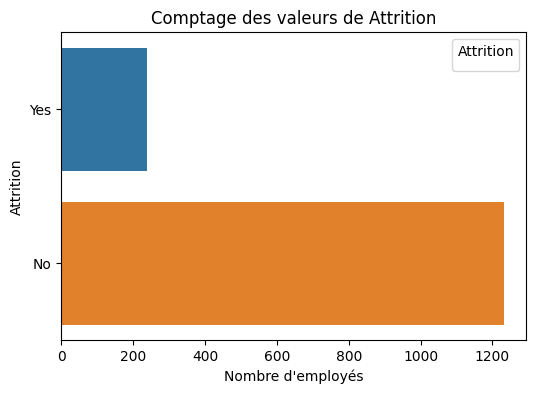

In [10]:
# Visualisation du taux d'attrition
plt.figure(figsize=(6, 4))
sns.countplot(y='Attrition', hue='Attrition', data=df)
plt.xlabel('Nombre d\'employés')
plt.ylabel('Attrition')
plt.title('Comptage des valeurs de Attrition')
plt.legend(title='Attrition', loc='best')
plt.show()

Affichons les proportions pour chacune des catégories de la base de données

In [11]:
# Pour chaque colonne de 'df'
for column in df.columns:
    # Appeler la fonction count_and_percentage si la colonne est de type object (catégorielle)
    if df[column].dtype == object:
        count_and_percentage(df, column)

PROPORTION DES DONNEES DE LA VARIABLE 'Attrition' :
           Comptage  Pourcentage (%)
Attrition                           
No             1233            83.88
Yes             237            16.12


PROPORTION DES DONNEES DE LA VARIABLE 'BusinessTravel' :
                   Comptage  Pourcentage (%)
BusinessTravel                              
Travel_Rarely          1043            70.95
Travel_Frequently       277            18.84
Non-Travel              150            10.20


PROPORTION DES DONNEES DE LA VARIABLE 'Department' :
                        Comptage  Pourcentage (%)
Department                                       
Research & Development       961            65.37
Sales                        446            30.34
Human Resources               63             4.29


PROPORTION DES DONNEES DE LA VARIABLE 'EducationField' :
                  Comptage  Pourcentage (%)
EducationField                             
Life Sciences          606            41.22
Medical             

In [12]:
# Liste des variables catégorielles
categorical_variables(df)

Liste des variables catégorielles :
- Attrition
- BusinessTravel
- Department
- EducationField
- Gender
- JobRole
- MaritalStatus
- OverTime


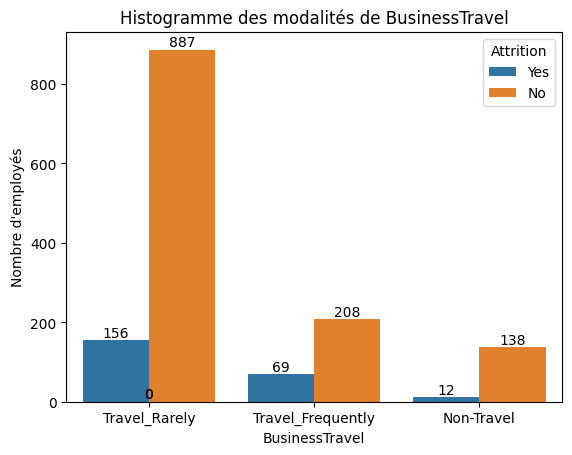

In [13]:
plot_histogram_by_category(df, "BusinessTravel")

Nous constatons que les 